# Importing libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2
from scipy.stats import expon
from scipy.stats import norm
from scipy.stats import uniform

## Task 1

$$
x_i = -\frac{1}{\lambda}ln e_i
$$

### Variables

In [2]:
lamArr = [0.5, 1.0, 1.5, 2.0, 2.5]
numOf = 10000
alpha = 0.05
numBins=50

### Define Functions

In [3]:
def xsquareExpTest(rndNumbers, numBins, alpha, lam, xMax=10):
    oFrequencies = np.histogram(rndNumbers, bins=numBins, density=True)[0]
    x = np.linspace(0, xMax, 50)
    eFrequency = expon.pdf(x, scale=1/lam)
    xsqrStats = np.sum((oFrequencies - eFrequency) ** 2 / eFrequency)
    freedomDeg = numBins - 1
    xsqrCrit = chi2.ppf(1 - alpha, freedomDeg)
    return xsqrStats, xsqrCrit

### Model Initialization

λ is 0.5:
Average: 1.9920366014799444
Dispersion: 4.047481984226693
XSquare: [0.027298488786596506, 66.3386488629688]
Distribution Match


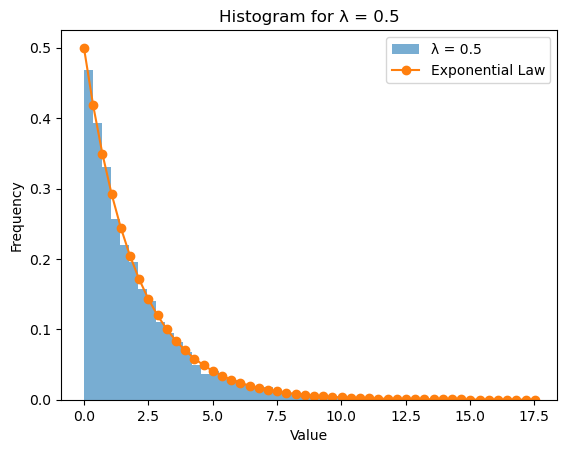

λ is 1.0:
Average: 0.9877298583710185
Dispersion: 1.0005506862345406
XSquare: [0.0613609551948384, 66.3386488629688]
Distribution Match


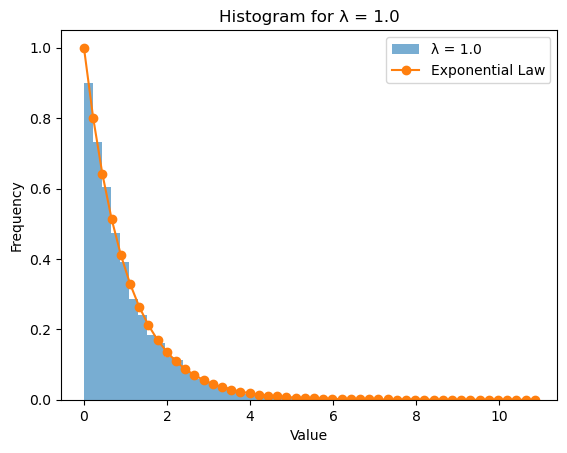

λ is 1.5:
Average: 0.6523945595734177
Dispersion: 0.42943550230224237
XSquare: [0.09197810367968803, 66.3386488629688]
Distribution Match


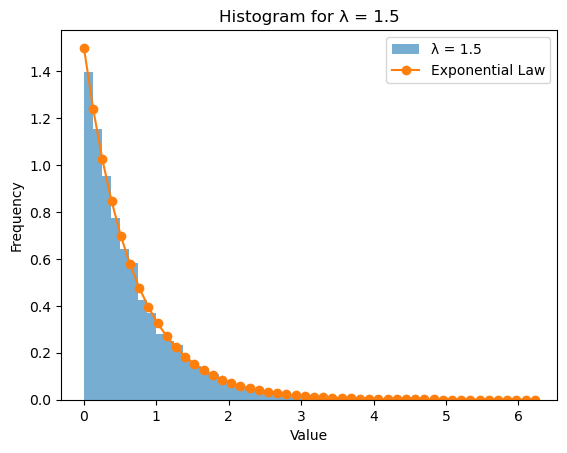

λ is 2.0:
Average: 0.4991134360588512
Dispersion: 0.2545938069222755
XSquare: [0.12196979117312702, 66.3386488629688]
Distribution Match


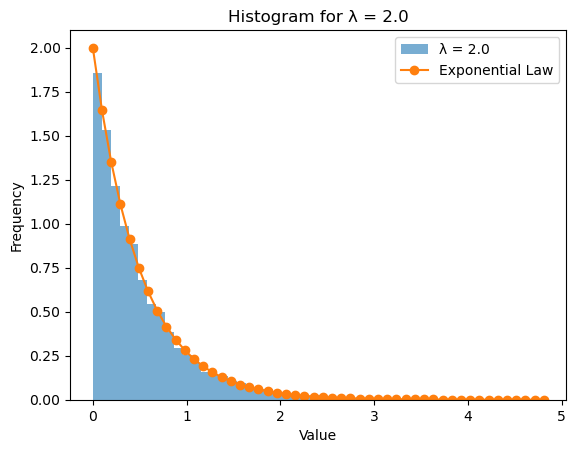

λ is 2.5:
Average: 0.4023188320506546
Dispersion: 0.1612458490022631
XSquare: [0.16718976907029154, 66.3386488629688]
Distribution Match


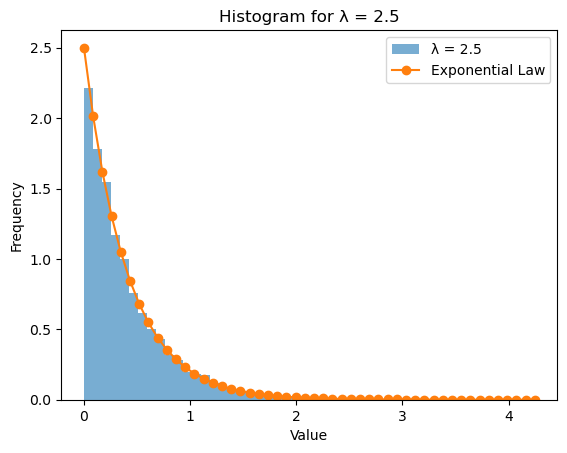

In [4]:
for lam in lamArr:
    rndNumbers = np.random.rand(numOf)
    rndENumbers = - (1 / lam) * np.log(rndNumbers)
    plt.hist(rndENumbers, bins=numBins, density=True, alpha=0.6, label=f'λ = {lam}')
    xMax = np.max(rndENumbers)
    x = np.linspace(0, xMax, 50)
    expLaw = expon.pdf(x, scale=1/lam)
    plt.plot(x, expLaw, 'o-', label='Exponential Law')
    average = np.mean(rndENumbers)
    dispersion = np.var(rndENumbers)
    xsqrStats, xsqrCrit = xsquareExpTest(rndENumbers, numBins, alpha, lam, xMax)

    print(f'λ is {lam}:')
    print(f'Average: {average}')
    print(f'Dispersion: {dispersion}')
    print(f'XSquare: [{xsqrStats}, {xsqrCrit}]')
        
    if xsqrCrit >= xsqrStats:
        print('Distribution Match')
    else:
        print('Distibution Doesnt Match')
        
    plt.legend()
    plt.title(f'Histogram for λ = {lam}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

## Task 2

### Variables

In [28]:
numOf = 10000
aArr = [0, 2, 4] 
omegaArr = [1, 2, 3] 
numBins = 30
alpha = 0.05

### Define Functions

In [31]:
def xsquareTest(rndNumbers, numBins, alpha):
    oFrequencies = np.histogram(rndNumbers, bins=numBins, density=True)[0]
    eFrequency = norm.pdf(np.linspace(-3, 3, numBins))
    xsqrStats = np.sum((oFrequencies - eFrequency) ** 2 / eFrequency)
    freedomDeg = numBins - 1
    xsqrCrit = chi2.ppf(1 - alpha, freedomDeg)
    return xsqrStats, xsqrCrit

def calculateUi():
    xiArr = np.random.rand(12)
    return np.sum(xiArr - 6)

def generateXArr(omega, a):
    mu = np.array([calculateUi() for _ in range(numOf)])
    return omega * mu + a

### Model Initialization

In [ ]:
for a in aArr:
    for omega in omegaArr:
        xArr = generateXArr(omega, a)
        average = np.mean(xArr)
        dispersion = np.var(xArr)
        xRange = np.linspace(min(xArr), max(xArr), 100)
        normal = norm.pdf(xRange, loc=average, scale=np.sqrt(dispersion))
        plt.hist(xArr, bins=numBins, density=True, alpha=0.6, label=f'omega:[{omega}] a:[{a}]')
        plt.plot(xRange, normal, 'o-', label=f'avg:[{mean}] sigma:[{np.sqrt(dispersion)}]')
        xsqrStats, xsqrCrit = xsquareTest(xArr, numBins, alpha)
    
        print(f'Omega is {omega} and A is {a}')
        print(f'XSquare: [{xsqrStats}, {xsqrCrit}]')
        
        if xsqrCrit >= xsqrStats:
            print('Distribution Match')
        else:
            print('Distibution Doesnt Match')
        
        plt.legend()
        plt.title(f'Histogram for omega={omega} and a={a}')
        plt.show()